In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/german_credit_data (1).csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


Categorical features:

1. Sex
2. Job
3. Housing
4. Savings account
5. Checking account
6. Purpose
7. Risk (label)

Numerical features:

1. Age
2. Credit Amount
3. Duration

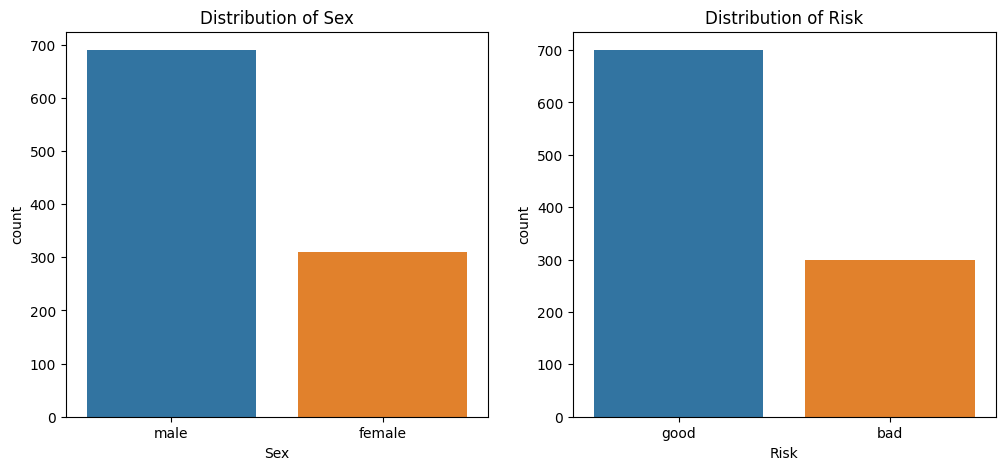

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for categorical variable 'Sex'
sns.countplot(x='Sex', data=df, ax=axes[0])
axes[0].set_title('Distribution of Sex')

# Plot for categorical variable 'Risk'
sns.countplot(x='Risk', data=df, ax=axes[1])
axes[1].set_title('Distribution of Risk')

plt.show()

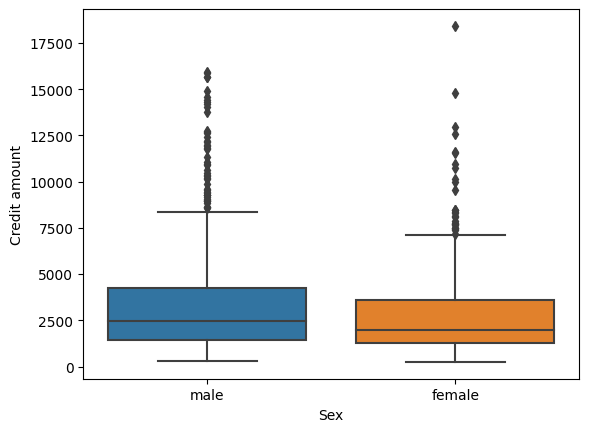

In [ ]:
# 'Sex' vs 'Credit amount'
sns.boxplot(x='Sex', y='Credit amount', data=df)
plt.show()

Exploring all categorical features

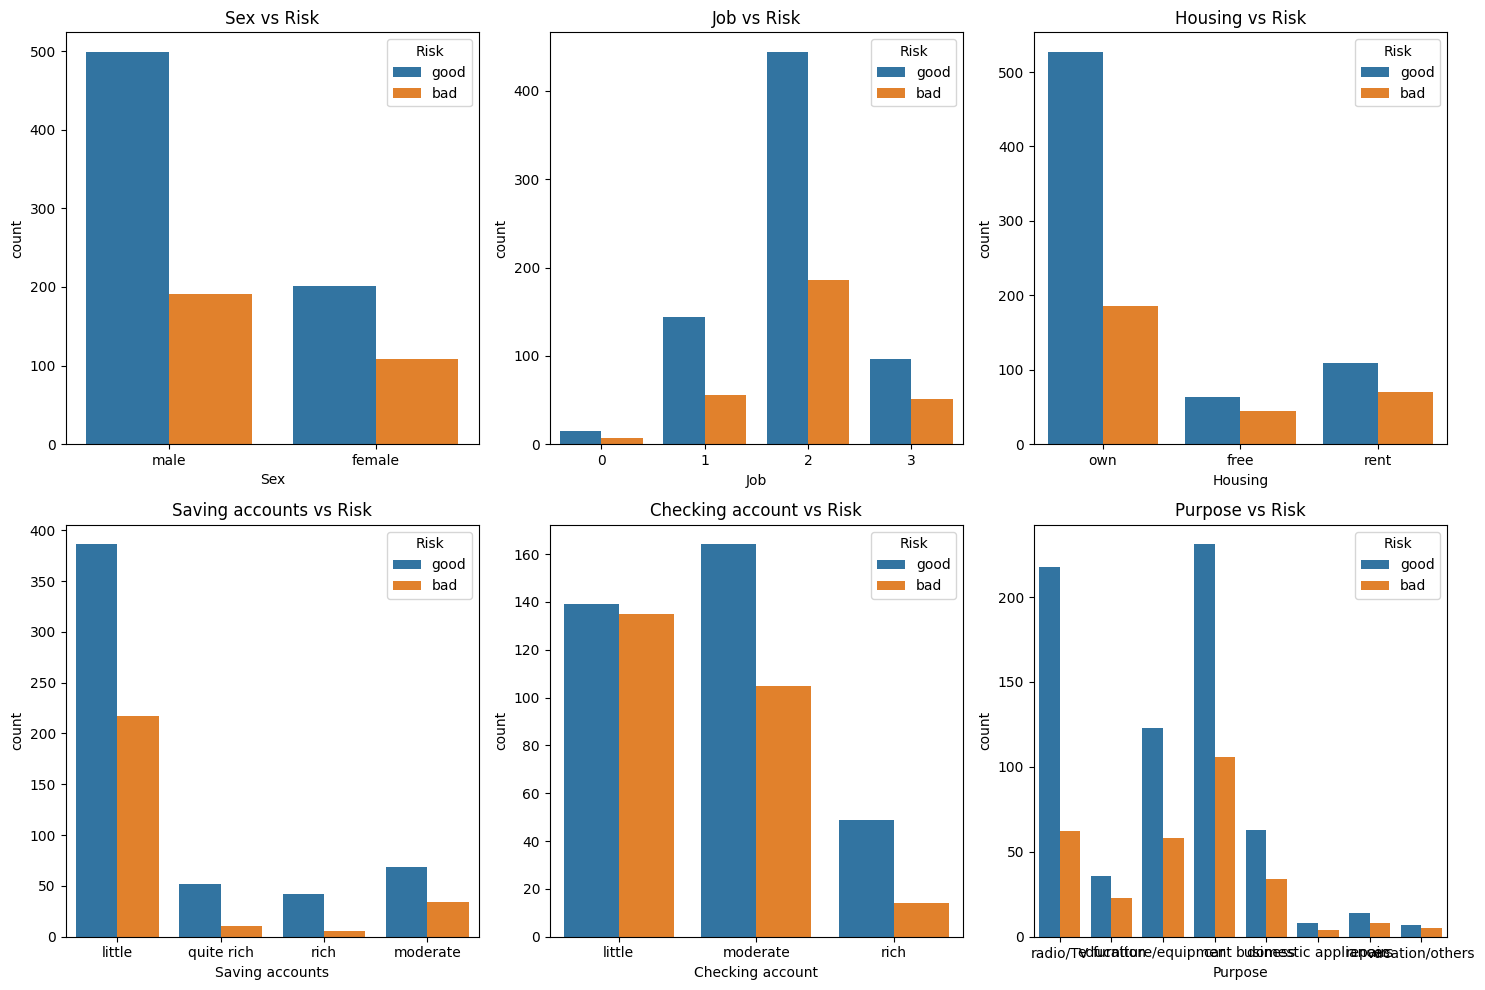

In [ ]:
# Create a figure and axes with a grid layout
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Categorical Variables
categorical_vars = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

# Plot each categorical variable with respect to 'Risk' in the grid layout
for i, var in enumerate(categorical_vars):
    row = i // 3  # Calculate the row index
    col = i % 3   # Calculate the column index

    sns.countplot(x=var, hue="Risk", data=df, ax=axes[row, col])
    axes[row, col].set_title(f'{var} vs Risk')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

Exploring all numerical features

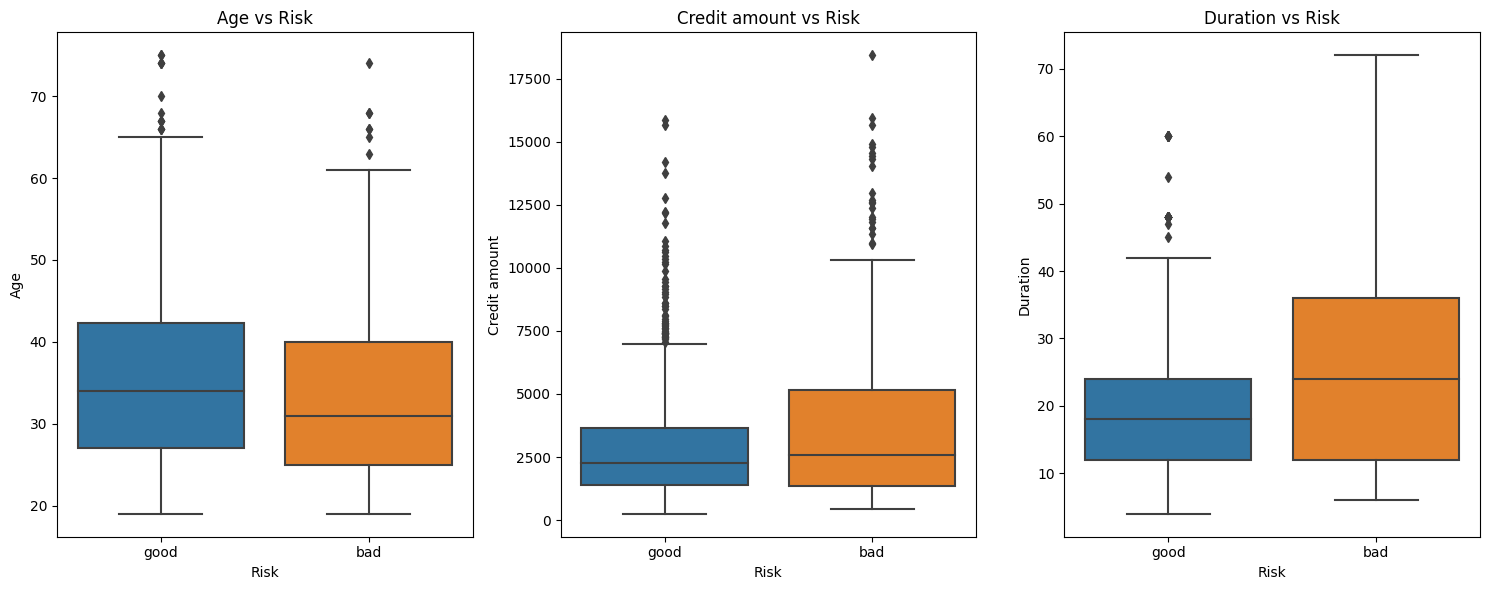

In [ ]:
# Create a figure and axes with a grid layout
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

# Numerical Variables
numerical_vars = ['Age', 'Credit amount', 'Duration']

# Plot each numerical variable with respect to 'Risk' in the grid layout
for i, var in enumerate(numerical_vars):
    sns.boxplot(x='Risk', y=var, data=df, ax=axes[i])
    axes[i].set_title(f'{var} vs Risk')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [ ]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [ ]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


Correlation matrix

<ipython-input-10-375a663054b2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


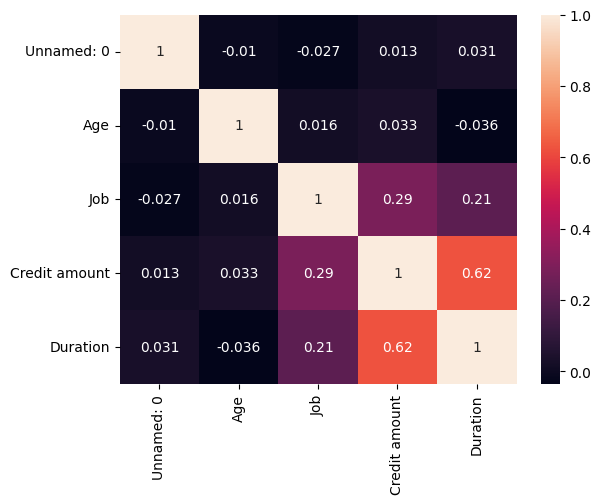

In [ ]:
# Heatmap to show correlations
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

only credit amount and duration correlation is greater than 0.5

# Data Preprocessing

this will involve treating missing values and encoding categorical features

## Handling Missing Values

We know

* Saving accounts
* Checking account

features have 20% and 40% missing data in their columns, respectively.

In [ ]:
print(df['Saving accounts'].value_counts())
print(df['Checking account'].value_counts())

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64


finding the best method for handling missing values amongst:

* imputation with a constant value
* imputation with mode
* imputation with k-NN model

by measuring the accuracy score for each way

In [ ]:
# 1st method -> imputation with a constant value
df_constant = pd.read_csv('/content/german_credit_data (1).csv')

# Filling NaN values with 'Unknown'
df_constant['Saving accounts'].fillna('Unknown', inplace=True)
df_constant['Checking account'].fillna('Unknown', inplace=True)

In [ ]:
# 2nd method -> imputation with mode
df_mode = pd.read_csv('/content/german_credit_data (1).csv')

# Filling NaN values with mode
df_mode['Saving accounts'].fillna(df_mode['Saving accounts'].mode()[0], inplace=True)
df_mode['Checking account'].fillna(df_mode['Checking account'].mode()[0], inplace=True)

In [ ]:
# 3rd method -> imputation with k-NN model
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer

# Creating an instance of the OrdinalEncoder
encoder = OrdinalEncoder()

# Selecting categorical columns to be encoded
cat_cols = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']

# Copying the dataframe to avoid changing the original one
df_encoded = df.copy()

# Encoding the categorical columns
df_encoded[cat_cols] = encoder.fit_transform(df[cat_cols])

# Creating an instance of the KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Applying the imputer
df_encoded = pd.DataFrame(imputer.fit_transform(df_encoded), columns = df.columns)

# Decoding the categorical columns back to their original form
df_encoded[cat_cols] = encoder.inverse_transform(df_encoded[cat_cols])

In [ ]:
# finding which method has highest accuracy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OrdinalEncoder

# Assuming df is your DataFrame and 'Risk' is the target variable
df_t = pd.read_csv('/content/german_credit_data (1).csv')
df_t['Risk'] = df_t['Risk'].apply(lambda x: 1 if x=='good' else 0)

# List of imputers
imputers = {
    'constant': SimpleImputer(strategy='constant', fill_value='Unknown'),
    'mode': SimpleImputer(strategy='most_frequent'),
    'knn': KNNImputer(n_neighbors=5)
}

# Initialize encoder
encoder = OrdinalEncoder()

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_t.drop('Risk', axis=1), df_t['Risk'],
                                                    test_size=0.2, random_state=42)

# Iterating over imputers
for name, imputer in imputers.items():
    # Copy the train and test sets
    X_train_imputed = X_train.copy()
    X_test_imputed = X_test.copy()

    # Apply encoding for knn imputer
    if name == 'knn':
        X_train_imputed[['Saving accounts', 'Checking account']] = encoder.fit_transform(X_train_imputed[['Saving accounts', 'Checking account']])
        X_test_imputed[['Saving accounts', 'Checking account']] = encoder.transform(X_test_imputed[['Saving accounts', 'Checking account']])

    # Perform imputation
    X_train_imputed[['Saving accounts', 'Checking account']] = imputer.fit_transform(X_train_imputed[['Saving accounts', 'Checking account']])
    X_test_imputed[['Saving accounts', 'Checking account']] = imputer.transform(X_test_imputed[['Saving accounts', 'Checking account']])

    # If knn, inverse transform after imputation
    if name == 'knn':
        X_train_imputed[['Saving accounts', 'Checking account']] = encoder.inverse_transform(X_train_imputed[['Saving accounts', 'Checking account']])
        X_test_imputed[['Saving accounts', 'Checking account']] = encoder.inverse_transform(X_test_imputed[['Saving accounts', 'Checking account']])

    # One-hot encoding for the categorical features
    X_train_imputed = pd.get_dummies(X_train_imputed)
    X_test_imputed = pd.get_dummies(X_test_imputed)

    # Training the model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_imputed, y_train)

    # Predicting the test set results and calculating the accuracy
    y_pred = model.predict(X_test_imputed)
    accuracy = accuracy_score(y_test, y_pred)

    print(f'Imputer: {name}, Accuracy: {accuracy}')

Imputer: constant, Accuracy: 0.725
Imputer: mode, Accuracy: 0.7
Imputer: knn, Accuracy: 0.7


We see that constant imputer has highest accuracy so we'll use that

In [ ]:
df_constant.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,Unknown,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,Unknown,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


### Scaling and encoding categorical features

In [ ]:
# List of numerical columns to be log transformed
numerical_columns = ['Age', 'Credit amount', 'Duration']

# Apply log(1 + x) transformation to all numerical columns
for col in numerical_columns:
    df_constant[col] = np.log1p(df_constant[col])

# Print the new DataFrame to verify
df_constant.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,4.219508,male,2,own,Unknown,little,7.064759,1.945910,radio/TV,good
1,1,3.135494,female,2,own,little,moderate,8.691483,3.891820,radio/TV,bad
2,2,3.912023,male,1,own,little,Unknown,7.648263,2.564949,education,good
3,3,3.828641,male,2,free,little,little,8.972464,3.761200,furniture/equipment,good
4,4,3.988984,male,2,free,little,little,8.491055,3.218876,car,bad


In [ ]:
# List of categorical columns to be one-hot encoded
categorical_columns = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df_constant, columns=categorical_columns)

# Print the new DataFrame to verify
df_encoded.head()

,Unnamed: 0,Age,Credit amount,Duration,Sex_female,Sex_male,Job_0,Job_1,Job_2,Job_3,...,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_bad,Risk_good
0,0,4.219508,7.064759,1.945910,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,1,3.135494,8.691483,3.891820,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,2,3.912023,7.648263,2.564949,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,3,3.828641,8.972464,3.761200,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4,4,3.988984,8.491055,3.218876,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


Standardizing numerical columns

In [ ]:
df_excluded = df_encoded.iloc[:, 1:]

from sklearn.preprocessing import StandardScaler

# Create a copy of the DataFrame
df_encoded_copy = df_excluded.copy()

# List of numerical columns
numerical_columns = ['Age', 'Credit amount', 'Duration']

# Create a scaler object
scaler = StandardScaler()

# Apply the scaler only to the numerical columns of the DataFrame copy
df_encoded_copy[numerical_columns] = scaler.fit_transform(df_encoded_copy[numerical_columns])

# Print the new DataFrame to verify
print(df_encoded_copy.head())

        Age  Credit amount  Duration  Sex_female  Sex_male  Job_0  Job_1  \
0  2.282879      -0.933992 -1.822056           0         1      0      0   
1 -1.438777       1.163149  1.741206           1         0      0      0   
2  1.227217      -0.181750 -0.688500           0         1      0      1   
3  0.940950       1.525385  1.502020           0         1      0      0   
4  1.491441       0.904761  0.508940           0         1      0      0   

   Job_2  Job_3  Housing_free  ...  Purpose_business  Purpose_car  \
0      1      0             0  ...                 0            0   
1      1      0             0  ...                 0            0   
2      0      0             0  ...                 0            0   
3      1      0             1  ...                 0            0   
4      1      0             1  ...                 0            1   

   Purpose_domestic appliances  Purpose_education  \
0                            0                  0   
1                     

utilizing clustering based on numerical data can also aid in training our Machine Learning models. Below, we employ the Elbow Method to determine a suitable value for the hyperparameter 'k' in the k-means clustering method.

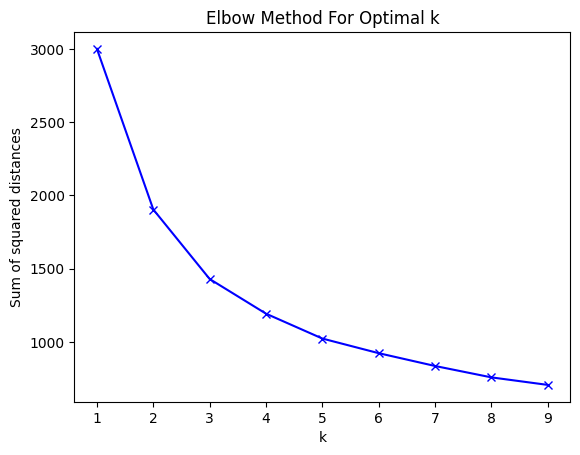

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extract only the numerical columns for k-means clustering
numerical_data = df_encoded_copy[numerical_columns]

# Calculate sum of squared distances
ssd = []
K = range(1,10)  # Check for up to 10 clusters
for k in K:
    km = KMeans(n_clusters=k, n_init = 10)
    km = km.fit(numerical_data)
    ssd.append(km.inertia_)  # Sum of squared distances

# Plot sum of squared distances / Inertia
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

k=3 seems suitable

In [ ]:
from sklearn.cluster import KMeans

# Define the number of clusters
n_clusters = 3

# Create a k-means object and fit it to the numerical data
km = KMeans(n_clusters=n_clusters, random_state=0, n_init = 10)
clusters = km.fit_predict(df_encoded_copy[numerical_columns])

In [ ]:
df_encoded_copy['cluster'] = clusters
df['cluster'] = clusters

the current data looks like this

In [ ]:
df_final = df_encoded_copy.copy()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1000 non-null   float64
 1   Credit amount                1000 non-null   float64
 2   Duration                     1000 non-null   float64
 3   Sex_female                   1000 non-null   uint8  
 4   Sex_male                     1000 non-null   uint8  
 5   Job_0                        1000 non-null   uint8  
 6   Job_1                        1000 non-null   uint8  
 7   Job_2                        1000 non-null   uint8  
 8   Job_3                        1000 non-null   uint8  
 9   Housing_free                 1000 non-null   uint8  
 10  Housing_own                  1000 non-null   uint8  
 11  Housing_rent                 1000 non-null   uint8  
 12  Saving accounts_Unknown      1000 non-null   uint8  
 13  Saving accounts_lit

In [ ]:
df_final.head()

,Age,Credit amount,Duration,Sex_female,Sex_male,Job_0,Job_1,Job_2,Job_3,Housing_free,...,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_bad,Risk_good,cluster
0,2.282879,-0.933992,-1.822056,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,2
1,-1.438777,1.163149,1.741206,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1.227217,-0.181750,-0.688500,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,2
3,0.940950,1.525385,1.502020,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,1.491441,0.904761,0.508940,0,1,0,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0


# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Define the features and the target
X = df_final.drop(columns=['Risk_good', 'Risk_bad'], axis=1)
y = df_final['Risk_good']

# Split the dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the models

## 1. KNN

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

knn = KNeighborsClassifier()

parameters = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],  # Example values, you can choose others
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 is manhattan_distance and 2 is euclidean_distance
}

grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parameters)
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.34      0.45        59
           1       0.77      0.93      0.84       141

    accuracy                           0.76       200
   macro avg       0.72      0.63      0.65       200
weighted avg       0.74      0.76      0.73       200

Accuracy Score: 0.755


## 2. Decision Tree

In [ ]:
# Import the required packages
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Instantiate the classifier
dtree = DecisionTreeClassifier(random_state=42)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters: ", best_params)

# Train the final model with the best parameters
final_model = DecisionTreeClassifier(**best_params)
final_model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = final_model.predict(X_test)

# Print the accuracy score and classification report
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best parameters:  {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
Accuracy:  0.65
              precision    recall  f1-score   support

           0       0.42      0.47      0.44        59
           1       0.77      0.72      0.74       141

    accuracy                           0.65       200
   macro avg       0.59      0.60      0.59       200
weighted avg       0.66      0.65      0.66       200



## 3. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# setup the hyperparameter grid
param_grid = [
    {'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio': [0.5], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'penalty': ['none'], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}
]

# instantiate the logistic regression model
logreg = LogisticRegression()

# instantiate the grid search model
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs=-1)

# fit the grid search to the data
grid_search.fit(X_train, y_train)

# print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# instantiate the logistic regression model with best parameters
best_logreg = LogisticRegression(C=grid_search.best_params_['C'], penalty=grid_search.best_params_['penalty'], solver=grid_search.best_params_['solver'])

# fit the model with the training data
best_logreg.fit(X_train, y_train)

# make predictions on the test data
y_pred = best_logreg.predict(X_test)

# evaluate the model
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best Parameters:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy:  0.765
              precision    recall  f1-score   support

           0       0.65      0.44      0.53        59
           1       0.79      0.90      0.84       141

    accuracy                           0.77       200
   macro avg       0.72      0.67      0.68       200
weighted avg       0.75      0.77      0.75       200



## 4. Multilayer Perceptron (MLP)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

mlp = MLPClassifier(max_iter=1000)

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
}

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

print('Best parameters found:\n', clf.best_params_)

final_mlp = MLPClassifier(max_iter=1000, **clf.best_params_)
final_mlp.fit(X, y)

y_pred = final_mlp.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters found:
 {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'solver': 'sgd'}
              precision    recall  f1-score   support

           0       0.66      0.39      0.49        59
           1       0.78      0.91      0.84       141

    accuracy                           0.76       200
   macro avg       0.72      0.65      0.67       200
weighted avg       0.75      0.76      0.74       200



## 5. SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import classification_report

# define the model
svc = svm.SVC()

# define the parameters for grid search
parameters = {'kernel': ('linear', 'rbf', 'poly'), 'C':[0.1, 1, 10], 'gamma':[1, 0.1, 0.01]}

# instantiate the grid search with 5-fold cross-validation
clf = GridSearchCV(svc, parameters, cv=5)

# fit the model to the training data
clf.fit(X_train, y_train)

# print the best hyperparameters
print("Best Parameters:\n", clf.best_params_)

# predict the test set results
y_pred = clf.predict(X_test)

# print the performance metrics
print(classification_report(y_test, y_pred))

Best Parameters:
 {'C': 10, 'gamma': 1, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.66      0.39      0.49        59
           1       0.78      0.91      0.84       141

    accuracy                           0.76       200
   macro avg       0.72      0.65      0.67       200
weighted avg       0.75      0.76      0.74       200



Analysis of the Machine Learning Models

After evaluating the performance metrics of the machine learning models on the dataset, it becomes evident that the Logistic Regression model outperforms the other models in terms of accuracy, precision, recall, and F1-score. The accuracy of the Logistic Regression model is 0.765, which surpasses the accuracy of the Decision Tree model (0.645), k-Nearest Neighbors (0.755), Multilayer Perceptron (0.77), and Support Vector Machine model (0.76). Moreover, the Logistic Regression model demonstrates superior weighted average precision, recall, and F1-score compared to the other models.

Although the k-Nearest Neighbors, Multilayer Perceptron, and Support Vector Machine models also exhibit decent performances with accuracy scores above 0.75, they still fall short in precision, recall, and F1-score when compared to the Logistic Regression model. On the other hand, the Decision Tree model underperforms significantly with an accuracy of 0.645, which is notably lower than the other models.

It is worth mentioning that despite having a higher accuracy score of 0.77, the Multilayer Perceptron (MLP) model lags behind in other metrics like Precision, Recall, and F1-score.